#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

#### Reading the data file

In [2]:
def train_data():
    train_path="D:/DATA SCIENCE/Asignments/Python/Health/Health Insurance Prediction/train.csv"
    train=pd.read_csv(train_path)
    return train

In [3]:
def test_data():
    test_path="D:/DATA SCIENCE/Asignments/Python/Health/Health Insurance Prediction/test.csv"
    test=pd.read_csv(test_path)
    return test

In [4]:
#Calling the function of data
train=train_data()
test=test_data()

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


### EDA (Exploratory Data Analysis)

In [7]:
# Let's check the data types and more information about our train and test data separately
print("TRAIN_DATA")
print(train.info())
print(train.isnull().sum())
print("===================================================")
print("TEST_DATA")
print(test.info())
print(test.isnull().sum())

TRAIN_DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
id                      0
Gender                  0
Age                     0
Driv

#### Inference: There is no Null value in the data.
But, 3 columns of our data(Gender, Vehicle_Age, and Vehicle_Damage) are not in numeric form. 
So, we have to perform encoding here on these 3 columns

In [8]:
# First check the unique values
print(train['Gender'].value_counts())
print(train['Vehicle_Age'].value_counts())
print(train['Vehicle_Damage'].value_counts())

Gender
Male      206089
Female    175020
Name: count, dtype: int64
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


### Encoding

#### Replaced values :-
Vehicle Age -
"<1 Year" = 0
"1-2 Year" = 1
">2 Year" = 2

Gender -
"Female" = 0
"Male" = 1

Vehicle Damage ->

"No" = 0
"Yes" = 1

In [9]:
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})

test['Vehicle_Age']=test['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Vehicle_Damage']=test['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [10]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [11]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297


In [12]:
# Correlation
train.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,0.000878,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.160427,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042


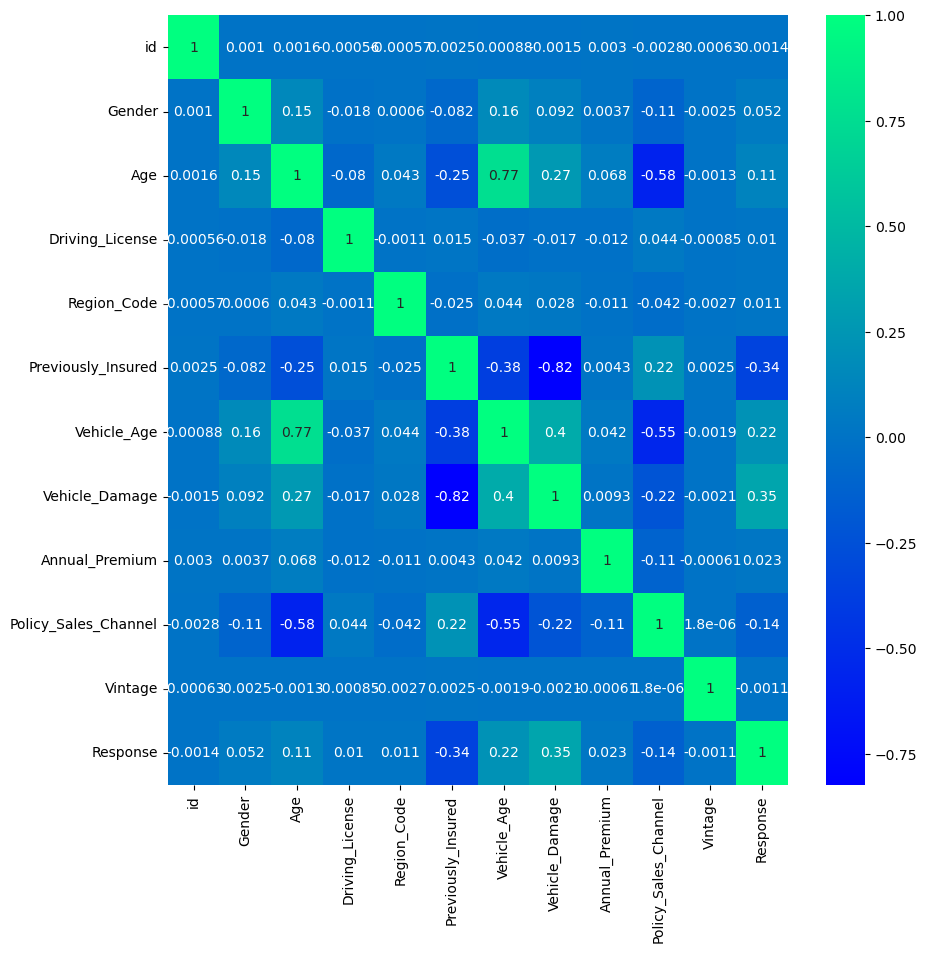

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True, cmap='winter')
plt.show()
plt.savefig('correlationfigure_insurance')

#### Inference: Vehicle_Damage and Vehicle_Age are positively correlated with Response, while Previously_Insured and Policy_Sales_Channel are negatively correlated with the response of customers.

<Axes: xlabel='Response', ylabel='count'>

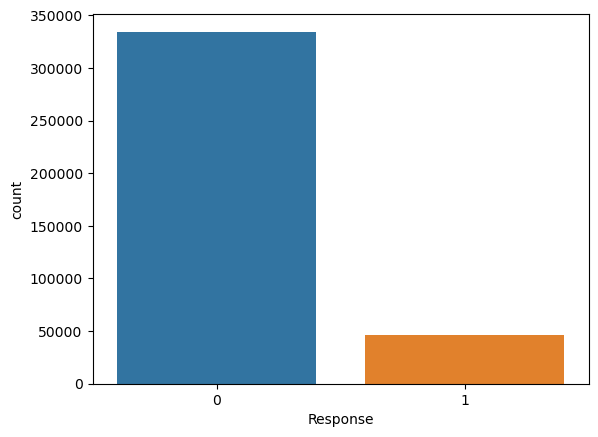

In [14]:
sns.countplot(x="Response", data=train)

In [15]:
#Positive Response
positive_count=train[train["Response"] == 1].value_counts().sum()
positive_count

46710

In [16]:
#Total Responses
total_response=train['Response'].value_counts().sum()
total_response

381109

In [17]:
print("The percentage of positive response in train data is :", round(positive_count*100/total_response),"%")

The percentage of positive response in train data is : 12 %


<Axes: xlabel='Previously_Insured', ylabel='count'>

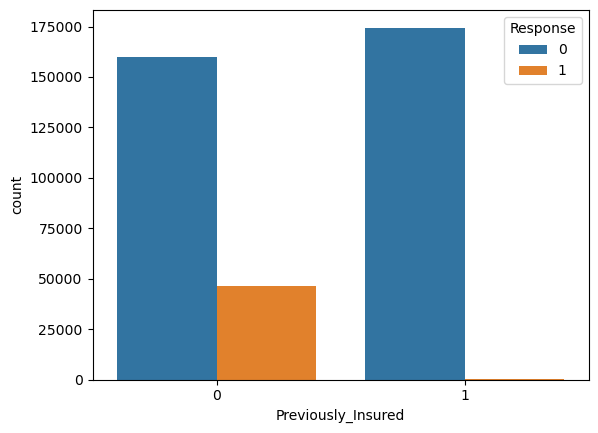

In [18]:
sns.countplot(x='Previously_Insured',data=train,hue='Response')

#### Inference: People who already have insurance might not be interested. Maybe it's because their current insurance hasn't ended yet.

In [19]:
print("Most used policy channel")
print(train['Policy_Sales_Channel'].value_counts())

Most used policy channel
Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64


C:\Users\91878\AppData\Local\Temp\ipykernel_13660\2488451306.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psc_interested)


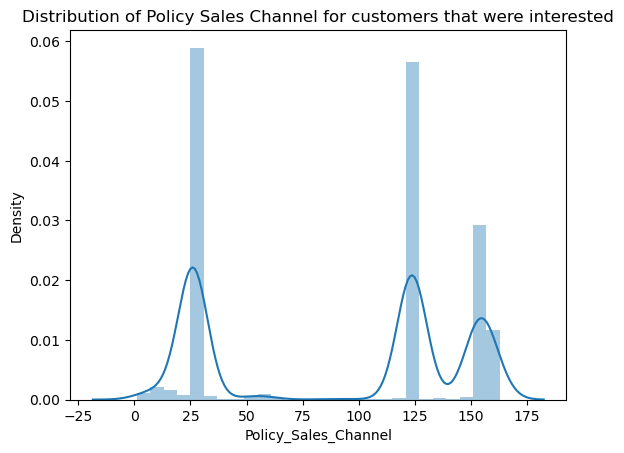

In [20]:
psc_interested = train.loc[train['Response'] == 1, 'Policy_Sales_Channel']
sns.distplot(psc_interested)
plt.title("Distribution of Policy Sales Channel for customers that were interested")
plt.show()

#### Inference: We can clearly see that people were mostly interested when Policy_Sales_Channel 152, 26 and 124 were used.

### Train-Test split

In [83]:
# Creating X (features) and y (target variable) in "train" dataframe
# here, we are taking the "train" dataframe first to build the model, then we will apply the best and more accurate column to the "test" dataframe
X = train.drop(['Response', 'id'], axis=1)  # Exclude the Response an 'id' column
y = train['Response']
def data_prep(train):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)
    return X_train,X_test,y_train,y_test

In [84]:
X_train,X_test,y_train,y_test=data_prep(train)

In [85]:
X_train.shape

(304887, 10)

In [86]:
X_test.shape

(76222, 10)

#### Above, we have splitted the dataset into train and test with 80% and 20% data respectively.

## Application of Algorithm into different models

### 1. DECISION TREE MODEL

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model_dstree=DecisionTreeClassifier(criterion="entropy") ## Create the model
train_model=model_dstree.fit(X_train,y_train) ## Fitting the model
pred1=train_model.predict(X_test) ## Predicting

In [88]:
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
len(pred1) #Checking the length

76222

In [90]:
def ds_tree_diag(y_test,pred1):
    acc_ds=accuracy_score(y_test, pred1)
    prc_ds=precision_score(y_test,pred1)
    clf_ds=classification_report(y_test,pred1)
    conf_ds=confusion_matrix(y_test,pred1)
    return acc_ds,clf_ds,conf_ds,prc_ds

In [91]:
acc_ds,clf_ds,conf_ds,prc_ds=ds_tree_diag(y_test,pred1)
print("MODEL 1- Decison Tree Model")
print("--------------------------------------------------")
print("The accuracy score:",acc_ds)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_ds)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_ds)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_ds)

MODEL 1- Decison Tree Model
--------------------------------------------------
The accuracy score: 0.8248012384875758
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66897
           1       0.29      0.31      0.30      9325

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222

--------------------------------------------------
The Confusion Matrix:
 [[59982  6915]
 [ 6439  2886]]
--------------------------------------------------
The Precision Score:
 0.29445974900520355


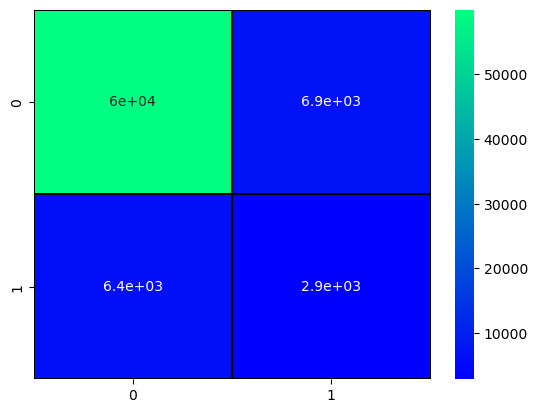

In [92]:
sns.heatmap(conf_ds, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('insurance_dstree_model_cnf_matrix')

#### Inference: From the above report, Decision Tree Model is giving accuracy score of about 82.5%

### 2. RANDOM FOREST CLASSIFIER

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model_rf=RandomForestClassifier(criterion='entropy')
train_model_2=model_rf.fit(X_train,y_train)
pred2=train_model_2.predict(X_test)

In [95]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
len(pred2)

76222

In [97]:
def rndm_tree_diag(y_test,pred2):
    acc_rndm=accuracy_score(y_test, pred2)
    prc_rndm=precision_score(y_test,pred2)
    clf_rndm=classification_report(y_test,pred2)
    conf_rndm=confusion_matrix(y_test,pred2)
    return acc_rndm,clf_rndm,conf_rndm,prc_rndm

In [98]:
acc_rndm,clf_rndm,conf_rndm,prc_rndm=rndm_tree_diag(y_test,pred2)
print("MODEL 3- Random Forest Classifier")
print("--------------------------------------------------")
print("The accuracy score:",acc_rndm)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_rndm)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_rndm)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_rndm)

MODEL 3- Random Forest Classifier
--------------------------------------------------
The accuracy score: 0.8666395528849938
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     66897
           1       0.37      0.12      0.18      9325

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222

--------------------------------------------------
The Confusion Matrix:
 [[64913  1984]
 [ 8181  1144]]
--------------------------------------------------
The Precision Score:
 0.3657289002557545


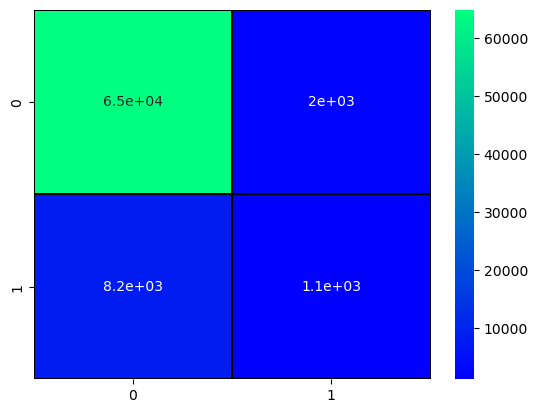

In [99]:
sns.heatmap(conf_rndm, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('insurance_rndmforest_cnf_matrix')

#### Inference: From the above report, Random Forest Classifier is giving accuracy score of about 86.6%

### 3. KNN MODEL (K-Nearest Neighbors) Classifier

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model_knn=KNeighborsClassifier(n_neighbors=13)
train_model_3=model_knn.fit(X_train,y_train)
pred3=train_model_3.predict(X_test)

In [104]:
pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
len(pred3)

76222

In [106]:
def knn_diag(y_test,pred3):
    acc_knn=accuracy_score(y_test, pred3)
    prc_knn=precision_score(y_test,pred3)
    clf_knn=classification_report(y_test,pred3)
    conf_knn=confusion_matrix(y_test,pred3)
    return acc_knn,clf_knn,conf_knn,prc_knn

In [74]:
acc_knn,clf_knn,conf_knn,prc_knn=knn_diag(y_test,pred3)
print("MODEL 3- Random Forest Classifier")
print("--------------------------------------------------")
print("The accuracy score:",acc_knn)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_knn)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_knn)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_knn)

MODEL 3- Random Forest Classifier
--------------------------------------------------
The accuracy score: 0.8772532864527302
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66897
           1       0.18      0.00      0.00      9325

    accuracy                           0.88     76222
   macro avg       0.53      0.50      0.47     76222
weighted avg       0.79      0.88      0.82     76222

--------------------------------------------------
The Confusion Matrix:
 [[66857    40]
 [ 9316     9]]
--------------------------------------------------
The Precision Score:
 0.1836734693877551


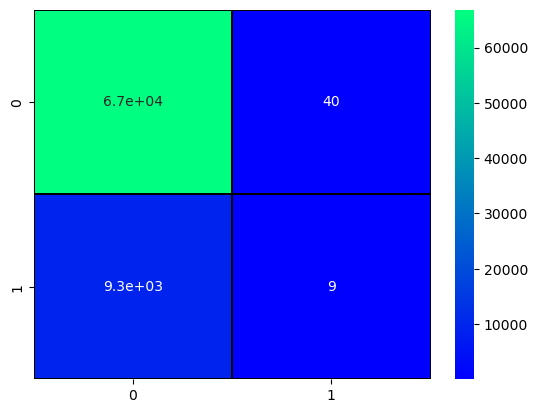

In [107]:
sns.heatmap(conf_knn, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('insurance_knn_cnf_matrix')

#### Inference: From the above report, Random Forest Classifier is giving accuracy score of about 87.7%

### Accuracy Scores of all models

In [108]:
print("DecisionTreeClassifier Accuracy = ",accuracy_score(y_test, pred1))
print("RandomForestClassifier Accuracy = ",accuracy_score(y_test,pred2))
print("KNeighborsClassifier Accuracy = ",accuracy_score(y_test,pred3))


DecisionTreeClassifier Accuracy =  0.8248012384875758
RandomForestClassifier Accuracy =  0.8666395528849938
KNeighborsClassifier Accuracy =  0.87553462254992


### Conclusion

#### KNN Model is showing the best accuracy score here. We will use the KNN model for our "test" dataframe.

In [79]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297


In [113]:
test.shape

(127037, 11)

In [109]:
Responses = model_knn.predict(test[test.columns[1:]]) # We have to exclude the id column as we also excluded in "train" dataframe when defining features

In [110]:
Responses

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
len(Responses)

127037

#### Making a DataFrame  by the name Submission

In [111]:
submission = pd.DataFrame(data = {'id': test['id'], 'Response': Responses})
submission.to_csv('submission.csv', index = False)
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
